In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
import os
import glob

## Read the SB input

In [16]:
## read bins quality data
mb = pd.read_excel('./input/Clusters_all_table.xlsx')
dt = mb[['sample','Bin_qual']].value_counts()
dt = dt.to_frame().reset_index()
dt = dt.rename(columns={0: 'Bins_number'})

dt = dt.pivot(index="sample", columns="Bin_qual", values="Bins_number").reset_index()
dt = dt.fillna(0)
dt.head()

Bin_qual,sample,HQ,LQ,MQ
0,V00H9L,14.0,3.0,9.0
1,V010T4,45.0,3.0,18.0
2,V03HFT,16.0,1.0,5.0
3,V03ZU2,10.0,0.0,4.0
4,V0404P,24.0,3.0,15.0


## Add the Contigs stats

In [21]:
cnt = pd.read_csv('input/ContigsRNumbStats_BGI.csv')
cnt1 = cnt[['name', 'reads_numb', 'nameS','contigs', 'avgCL_bp','maxCL_bp','N50','total_bp']]
cnt1 = cnt1.rename(columns={'name': "file_name", 'reads_numb': "reads_number", 'nameS': "sample", 'contigs': "contigs_number"})

sb3 = pd.merge(dt, cnt1, on='sample', how='left')
sb3.to_excel('results/MB_stats.xlsx')

sb3.head()

,sample,HQ,LQ,MQ,file_name,reads_number,contigs_number,avgCL_bp,maxCL_bp,N50,total_bp
0,V00H9L,14.0,3.0,9.0,lab66_V00H9L_E100013118_L01,41062933,252425,1559,820802,5341,393597366
1,V010T4,45.0,3.0,18.0,lab66_V010T4_E100016707_L01,61430173,319261,1739,650476,7833,555435430
2,V03HFT,16.0,1.0,5.0,lab66_V03HFT_E100009678_L01,53360407,184666,1809,565616,6984,334112685
3,V03ZU2,10.0,0.0,4.0,lab66_V03ZU2_E100013421_L01,29134723,294487,1338,497423,2963,394208077
4,V0404P,24.0,3.0,15.0,lab66_V0404P_E100013117_L01,104975598,358026,1401,558463,3392,501735855


## Vizualization

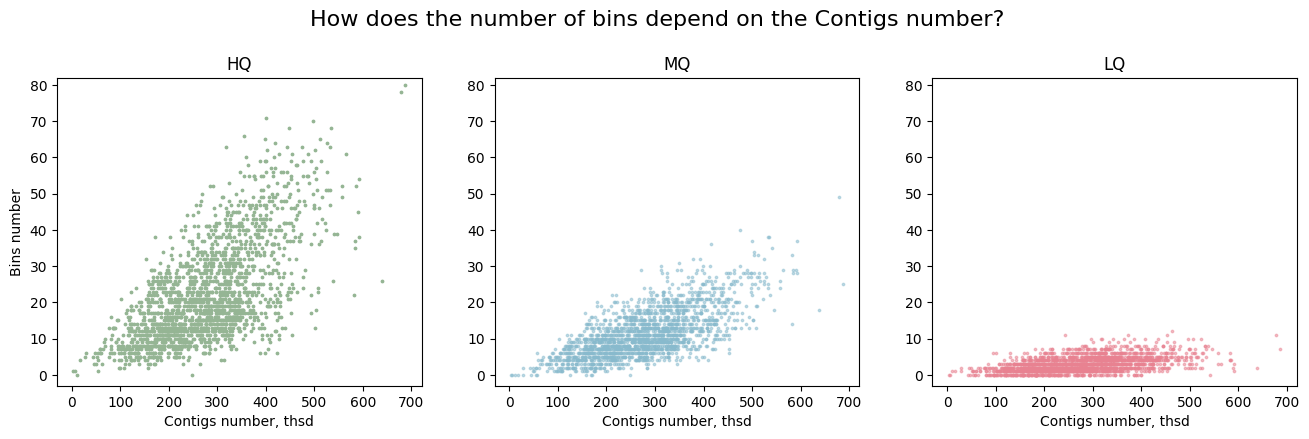

In [61]:
## Bins Number vs Contigs Number

plt.figure(figsize=(16, 4))
plt.suptitle('How does the number of bins depend on the Contigs number?', fontsize=16, y=1.05)

plt.subplot(1, 3, 1)
plt.scatter(sb3['contigs_number']/1000, sb3['HQ'], label='dastool',  s=3, c='#95B594') #c='#F0BEA6'
plt.xlabel('Contigs number, thsd')
plt.ylabel('Bins number')
plt.title('HQ')
plt.ylim(-3, 82)

plt.subplot(1, 3, 2)
plt.scatter(sb3['contigs_number']/1000, sb3['MQ'], label='metabat', alpha=0.5, s=3, c='#88BACD')
plt.xlabel('Contigs number, thsd')
plt.title('MQ')
plt.ylim(-3, 82)

plt.subplot(1, 3, 3)
plt.scatter(sb3['contigs_number']/1000, sb3['LQ'], label='maxbin', alpha=0.5, s=3, c='#e88291')
plt.xlabel('Contigs number, thsd')
plt.title('LQ')
plt.ylim(-3, 82)

plt.savefig('results/MB_bins_vs_Contigs.png', dpi=300, bbox_inches='tight')
plt.savefig('results/MB_bins_vs_Contigs.svg', bbox_inches='tight')


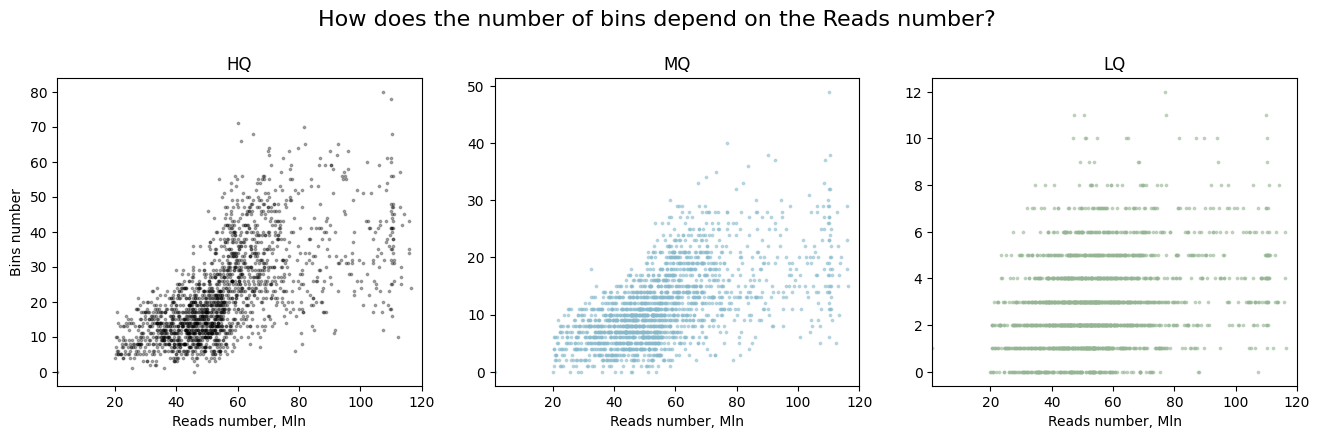

In [62]:
## Reads Number vs Contigs Number

plt.figure(figsize=(16, 4))
plt.suptitle('How does the number of bins depend on the Reads number?', fontsize=16, y=1.05)

plt.subplot(1, 3, 1)
plt.scatter(sb3['reads_number']/1000000, sb3['HQ'], label='dastool',  s=3, c='black', alpha=0.3) #c='#F0BEA6'
plt.xlabel('Reads number, Mln')
plt.ylabel('Bins number')
plt.title('HQ')
#plt.ylim(-10, 500)
plt.xlim(1,120)

plt.subplot(1, 3, 2)
plt.scatter(sb3['reads_number']/1000000, sb3['MQ'], label='metabat', alpha=0.5, s=3, c='#88BACD')
plt.xlabel('Reads number, Mln')
plt.title('MQ')
#plt.ylim(-10, 500)
plt.xlim(1,120)

plt.subplot(1, 3, 3)
plt.scatter(sb3['reads_number']/1000000, sb3['LQ'], label='maxbin', alpha=0.5, s=3, c='#95B594')
plt.xlabel('Reads number, Mln')
plt.title('LQ')
#plt.ylim(-10, 500)
plt.xlim(1,120)

plt.savefig('results/MB_bins_vs_Reads.png', dpi=300, bbox_inches='tight')
plt.savefig('results/MB_bins_vs_Reads.svg', bbox_inches='tight')


In [76]:
c1 = sb3['total_bp'].corr(sb3['HQ']).__round__(2)

0.78

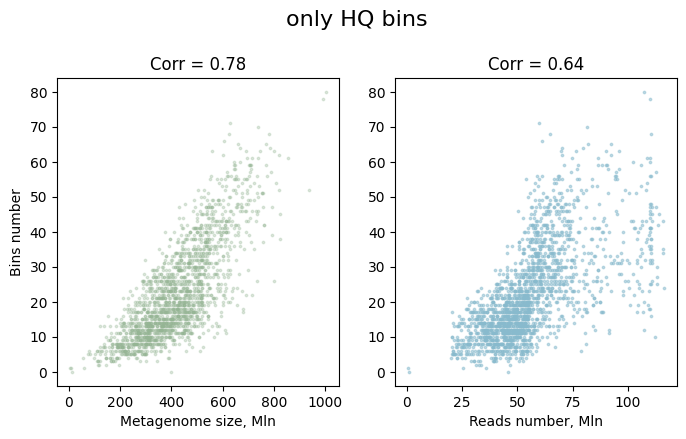

In [83]:
## Reads Number vs Contigs Number

plt.figure(figsize=(8, 4))
plt.suptitle('only HQ bins', fontsize=16, y=1.05)

plt.subplot(1, 2, 1)
plt.scatter(sb3['total_bp']/1000000, sb3['HQ'], label='HQ',  s=3, c='#95B594', alpha=0.3) #c='#F0BEA6'
plt.xlabel('Metagenome size, Mln')
plt.ylabel('Bins number')
c1 = sb3['total_bp'].corr(sb3['HQ']).__round__(2)
plt.title('Corr = '+str(c1))


plt.subplot(1, 2, 2)
plt.scatter(sb3['reads_number']/1000000, sb3['HQ'], label='HQ', alpha=0.5, s=3, c='#88BACD')
plt.xlabel('Reads number, Mln')
c2 = sb3['reads_number'].corr(sb3['HQ']).__round__(2)
plt.title('Corr = '+str(c2))

plt.savefig('results/HQ_bins.png', dpi=300, bbox_inches='tight')
plt.savefig('results/HQ_bins.svg', bbox_inches='tight')


## Correlation matrix

In [63]:
sb4 = sb3.replace(0, np.nan)

/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_72614/2951144269.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = sb4.corr()


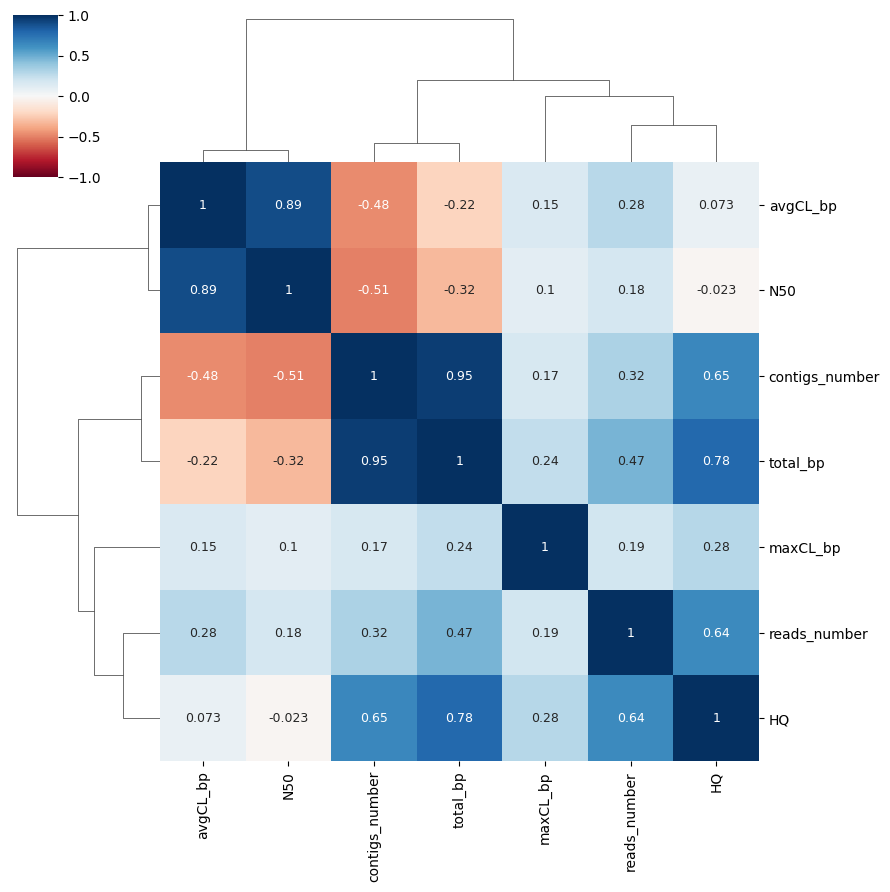

In [65]:
corD = sb3[['reads_number', 'contigs_number', 'HQ', 'avgCL_bp', 'maxCL_bp', 'N50', 'total_bp']].corr()
cor = sb4.corr()
cor


sns.clustermap(corD, method="complete", cmap='RdBu', annot=True,
               annot_kws={"size": 9}, vmin=-1, vmax=1, figsize=(9,9))

plt.savefig('results/MB_correlation1.png', dpi=300, bbox_inches='tight')
plt.savefig('results/MB_correlation1.svg', bbox_inches='tight')